In [50]:
import tensorflow as tf
import os

In [51]:

# Avoid OOM errors by setting GPU Memory Consumption Growth
#gpus = tf.config.experimental.list_physical_devices('GPU')
#for gpu in gpus: 
#    tf.config.experimental.set_memory_growth(gpu, True)

In [52]:
#OpenCV (Open Source Computer Vision Library) is an open-source computer vision and machine learning software library. It contains more than 2500 optimized algorithms for various tasks like image processing, object detection, face recognition, and more.
#The imghdr module in Python is used to determine the type of image contained in a file or byte stream. It can recognize several types of image files, such as JPEG, PNG, BMP, GIF, and others.

import cv2
import imghdr

In [53]:
data_dir = 'data'

In [54]:
os.listdir(data_dir)

['happy', 'sad']

In [55]:
image_exts = ['jpeg','jpg','bmp','png']

In [56]:
img = cv2.imread(os.path.join('data','happy','smile.woman_.jpg'))
img

array([[[  1, 189, 140],
        [  1, 189, 140],
        [  1, 189, 140],
        ...,
        [  0, 153, 114],
        [  0, 153, 114],
        [  0, 153, 114]],

       [[  1, 189, 140],
        [  1, 189, 140],
        [  1, 189, 140],
        ...,
        [  0, 153, 114],
        [  0, 153, 114],
        [  0, 153, 114]],

       [[  1, 189, 140],
        [  1, 189, 140],
        [  1, 189, 140],
        ...,
        [  0, 153, 114],
        [  0, 153, 114],
        [  0, 153, 114]],

       ...,

       [[  0, 157, 117],
        [  0, 157, 117],
        [  0, 157, 117],
        ...,
        [  0, 131,  98],
        [  0, 131,  98],
        [  0, 131,  98]],

       [[  0, 157, 117],
        [  0, 157, 117],
        [  0, 157, 117],
        ...,
        [  0, 131,  98],
        [  0, 131,  98],
        [  0, 131,  98]],

       [[  0, 157, 117],
        [  0, 157, 117],
        [  0, 157, 117],
        ...,
        [  0, 131,  98],
        [  0, 131,  98],
        [  0, 131,  98]]

In [57]:
import matplotlib.pyplot as plt

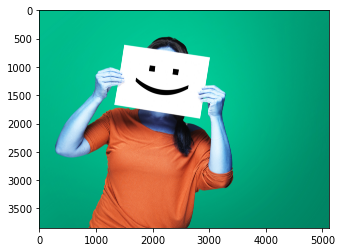

In [58]:
plt.imshow(img)

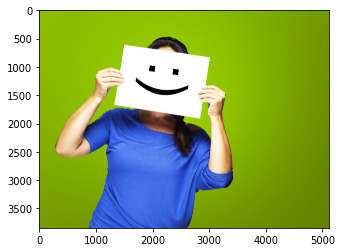

In [59]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [60]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Image not in ext list {image_path}.')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}')

In [61]:
#LOAD DATA
import numpy as np
import matplotlib.pyplot as plt


In [62]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 167 files belonging to 2 classes.


In [63]:
#tf.keras.utils.image_dataset_from_directory??

In [64]:
len(data)

6

In [65]:
data_iterator = data.as_numpy_iterator()

In [66]:
batch = data_iterator.next()

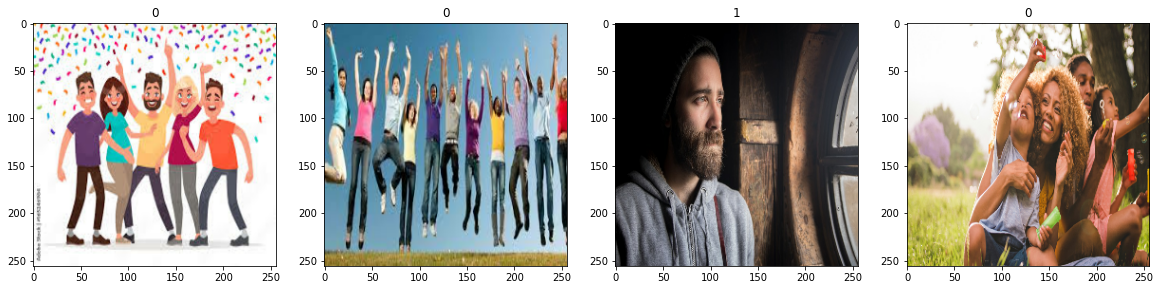

In [67]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [68]:
#1: Sad
#0: happy
data = data.map(lambda x,y: (x/255,y))

In [69]:
data.as_numpy_iterator().next()

(array([[[[8.23529437e-02, 3.01960796e-01, 1.09803922e-01],
          [9.41176489e-02, 3.05882365e-01, 1.13725491e-01],
          [9.01960805e-02, 2.94117659e-01, 1.05882354e-01],
          ...,
          [7.84313753e-02, 2.98039228e-01, 1.13725491e-01],
          [7.84313753e-02, 2.98039228e-01, 1.13725491e-01],
          [7.45098069e-02, 2.94117659e-01, 1.09803922e-01]],
 
         [[8.23529437e-02, 3.01960796e-01, 1.09803922e-01],
          [9.41176489e-02, 3.05882365e-01, 1.13725491e-01],
          [9.01960805e-02, 2.94117659e-01, 1.05882354e-01],
          ...,
          [7.84313753e-02, 2.98039228e-01, 1.13725491e-01],
          [7.84313753e-02, 2.98039228e-01, 1.13725491e-01],
          [7.45098069e-02, 2.94117659e-01, 1.09803922e-01]],
 
         [[8.23529437e-02, 3.01960796e-01, 1.09803922e-01],
          [9.41176489e-02, 3.05882365e-01, 1.13725491e-01],
          [9.01960805e-02, 2.94117659e-01, 1.05882354e-01],
          ...,
          [8.23529437e-02, 3.01960796e-01, 1.1764

In [70]:
len(data)

6

In [71]:
train_size = int(len(data)*0.6)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.2)

In [72]:
test_size

1

In [73]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [74]:
len(test)

1

In [75]:
#Conv2D:Applies a 2D convolution operation to the input data, which is typically used for processing image data. This layer is useful for feature extraction by applying filters (kernels) to the input image.
#MaxPooling2D: Reduces the spatial dimensions (height and width) of the input data by taking the maximum value over a defined window. This layer is often used after convolutional layers to reduce the dimensionality and computation.
#Dense:  A fully connected layer where every input node is connected to every output node. This layer is often used at the end of a network for classification or regression tasks.
#Flatten: Flattens the input data to a single dimension. Typically used to convert 2D data (like image data) into a 1D vector before passing it to a fully connected (Dense) layer.
#Dropout: A regularization layer that randomly sets a fraction of input units to 0 at each update during training, which helps prevent overfitting.

In [76]:
#MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [77]:
model = Sequential()

In [78]:
model.add(Conv2D(16,(3,3), 1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [79]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [81]:
logdir = 'logs'

In [82]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [83]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
3/3 [==============================] - 7s 2s/step - loss: 0.7200 - accuracy: 0.6042 - val_loss: 0.6364 - val_accuracy: 0.7500
Epoch 2/20
3/3 [==============================] - 5s 1s/step - loss: 0.6530 - accuracy: 0.5625 - val_loss: 0.5324 - val_accuracy: 0.5938
Epoch 3/20
3/3 [==============================] - 5s 1s/step - loss: 0.5359 - accuracy: 0.8438 - val_loss: 0.4669 - val_accuracy: 0.9375
Epoch 4/20
3/3 [==============================] - 5s 2s/step - loss: 0.4379 - accuracy: 0.8854 - val_loss: 0.3664 - val_accuracy: 0.7812
Epoch 5/20
3/3 [==============================] - 5s 1s/step - loss: 0.4162 - accuracy: 0.8125 - val_loss: 0.4130 - val_accuracy: 0.8438
Epoch 6/20
3/3 [==============================] - 5s 1s/step - loss: 0.3323 - accuracy: 0.8646 - val_loss: 0.1881 - val_accuracy: 0.9062
Epoch 7/20
3/3 [==============================] - 5s 1s/step - loss: 0.2746 - accuracy: 0.8854 - val_loss: 0.2174 - val_accuracy: 0.8750
Epoch 8/20
3/3 [=========================

In [84]:
import seaborn as sns

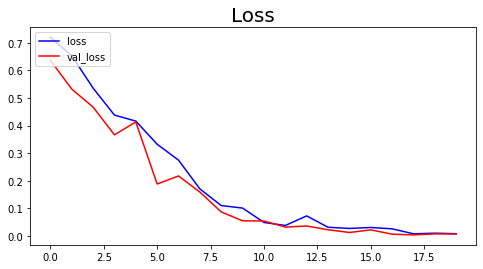

In [85]:
plt.figure(figsize=(8,4))
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
plt.title('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

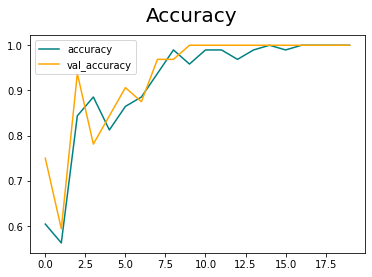

In [86]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [87]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [88]:

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [89]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 222ms/step


In [90]:
print(f'presicion: {pre.result().numpy()},recall: {re.result().numpy()},accuracy: {acc.result().numpy()}')


presicion: 1.0,recall: 1.0,accuracy: 1.0


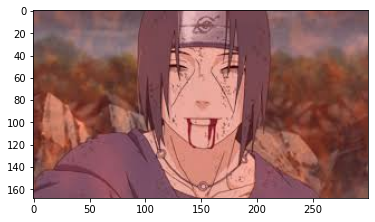

In [91]:
img = cv2.imread('itachi.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

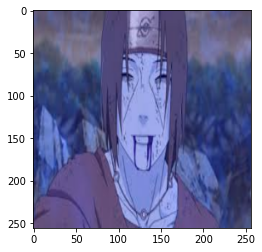

In [92]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [93]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 93ms/step


In [94]:
yhat

array([[0.967798]], dtype=float32)

In [95]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
